In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
import warnings
warnings.filterwarnings('ignore')

Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.

In [67]:
olimpicos_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [68]:
df = pd.read_csv(olimpicos_url)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Filtra el DataFrame para incluir solo las filas correspondientes a los ganadores de medallas de 2016.



In [69]:
df_filter = df.loc[(df['Year']==2016) & (df['Medal'].notna())]
df_filter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Descubre las medallas concedidas en 2016 en cada deporte.

In [70]:
med_dep = df_filter.groupby('Sport')['Medal'].count().reset_index()
print(med_dep)

                    Sport  Medal
0                 Archery     24
1               Athletics    192
2               Badminton     24
3              Basketball     72
4        Beach Volleyball     12
5                  Boxing     51
6                Canoeing     82
7                 Cycling     84
8                  Diving     36
9           Equestrianism     45
10                Fencing     65
11               Football    106
12                   Golf      6
13             Gymnastics     66
14               Handball     89
15                 Hockey     99
16                   Judo     56
17      Modern Pentathlon      6
18    Rhythmic Gymnastics     18
19                 Rowing    144
20           Rugby Sevens     74
21                Sailing     45
22               Shooting     45
23               Swimming    191
24  Synchronized Swimming     32
25           Table Tennis     24
26              Taekwondo     32
27                 Tennis     24
28           Trampolining      6
29        

Enumera los cinco deportes más importantes en función del mayor número de medallas concedidas. Filtra el DataFrame una vez más para incluir solo los registros de los cinco deportes principales en 2016.

In [71]:
med_ord = med_dep.sort_values(by = 'Medal', ascending=False)
med_ord.head()

dcinco = med_ord.head(5)
dcinco

,Sport,Medal
1,Athletics,192
23,Swimming,191
19,Rowing,144
11,Football,106
15,Hockey,99


In [72]:
deportes_dff = df_filter[df_filter['Sport'].isin(dcinco['Sport'])]
deportes_dff.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


Genere un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales.

Text(0.5, 0.98, 'Número de Medallas de los cinco deportes principales')

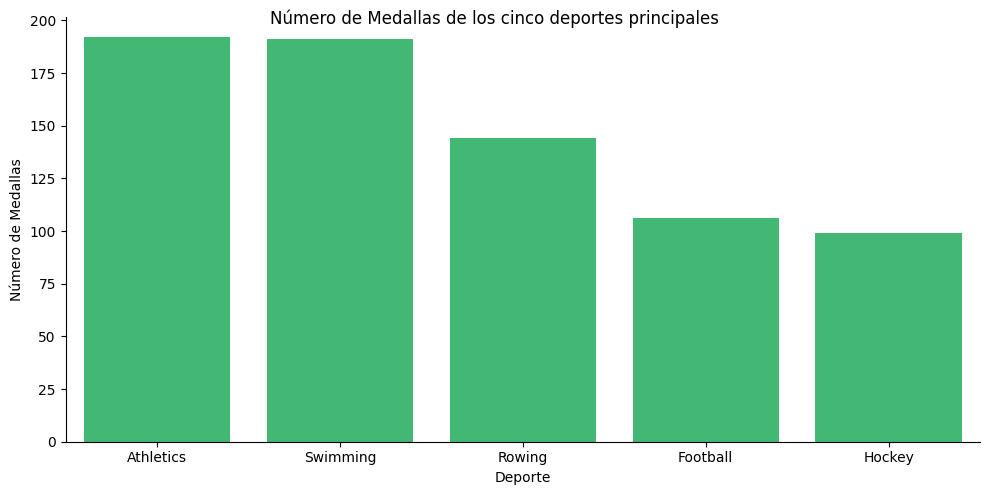

In [73]:
ax = sns.catplot(data = dcinco, x = 'Sport', y = 'Medal', kind = 'bar', aspect = 2, color = '#2ECC71')

# Configuración de la gráfica
ax.set_axis_labels('Deporte', 'Número de Medallas')
ax.figure.suptitle('Número de Medallas de los cinco deportes principales')


Generar un histograma para la característica Edad de todos los ganadores de medallas en los cinco deportes principales (2016).


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

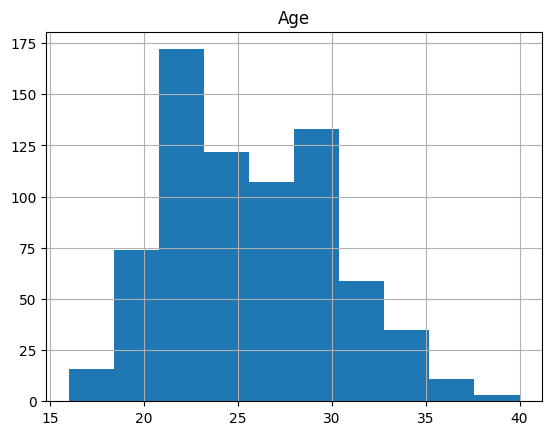

In [74]:
deportes_dff.hist(column='Age' )


Genera un gráfico de barras que indique cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016.

In [75]:
equipos_5 = deportes_dff.groupby('Team')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)
equipos_5.head()
equipos_5_ = equipos_5.head(5)
print(equipos_5_)

             Team  Medal
52  United States    127
20        Germany     88
21  Great Britain     69
10         Canada     45
2       Australia     43


In [76]:
equiposs_5 = deportes_dff.groupby(["Team", "Sport"])["Medal"].count().reset_index(name="count")
equipos=equipos_5_['Team']
equipos_df = equiposs_5[equiposs_5['Team'].isin(equipos)]
print(equipos_df)

             Team      Sport  count
2       Australia  Athletics      2
3       Australia     Rowing      9
4       Australia   Swimming     32
17         Canada  Athletics     10
18         Canada   Football     18
19         Canada     Rowing      2
20         Canada   Swimming     15
38        Germany  Athletics      3
39        Germany   Football     35
40        Germany     Hockey     33
41        Germany     Rowing     17
42  Great Britain  Athletics     14
43  Great Britain     Hockey     16
44  Great Britain     Rowing     26
45  Great Britain   Swimming     13
90  United States  Athletics     46
91  United States     Rowing     10
92  United States   Swimming     71


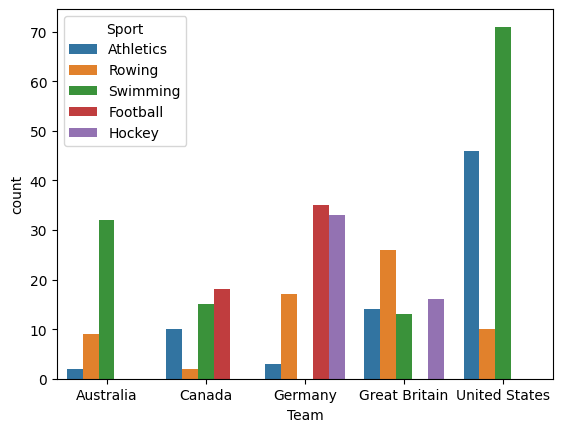

In [77]:
ax = sns.barplot(x = "Team", y = "count", hue = 'Sport', data = equipos_df)

In [78]:
generos = deportes_dff.groupby(["Sex", "Sport"])["Weight"].sum().reset_index(name='Total_Weight')

print(generos)
#equipos=equipos_5_['Team']
#equipos_df = equiposs_5[equiposs_5['Team'].isin(equipos)]
#print(generos)

  Sex      Sport  Total_Weight
0   F  Athletics        5945.0
1   F   Football        3400.0
2   F     Hockey        3090.0
3   F     Rowing        4306.0
4   F   Swimming        6421.0
5   M  Athletics        7433.0
6   M   Football        3862.0
7   M     Hockey        3919.0
8   M     Rowing        7462.0
9   M   Swimming        7757.0


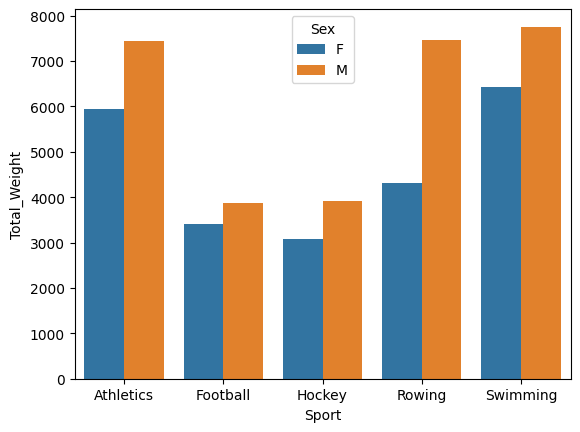

In [79]:
ax = sns.barplot(x = "Sport", y = "Total_Weight", hue = 'Sex', data = generos, estimator=mean, ci = 68)



Genere un gráfico de barras que indique el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.